# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

# Tabla de Contenido

* [1.1 Inicialización](#inicialización)
    * [1.1.1 Cargar datos](#1.1.1)
    * [1.1.2 Explorar datos iniciales](#1.1.2)
    * [1.1.3 Conclusiones y siguientes pasos](#1.1.3)
* [1.2 Tratar los valores ausentes (si hay)](#1.2)
* [1.3 Corregir los tipos de datos](#1.3)
* [1.4 Enriquecer datos](#1.4)
* [1.5 Comprobar datos limpios](#1.5)
* [1.6 Estudiar parámetros principales](#1.6)
    * [1.6.1 Histogramas](#1.6.1)
    * [1.6.2 Diagramas de caja](#1.6.2)
    * [1.6.3 Generalidades de las columnas](#1.6.3)
* [1.7 Estudiar y tratar valores atípicos](#1.7)
* [1.8 Estudiar parámetros principales sin valores atípicos](#1.8)
* [1.9 Periodo de colocación de los anuncios](#1.9)
* [1.10 Precio promedio por cada tipo de vehículo](#1.10)
* [1.11 Factores de precio](#1.11)
* [1.12 Conclusión general](#1.12)



## Inicialización

In [33]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as mode


### Cargar datos

In [3]:
# Carga el archivo de datos en un DataFrame

df = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [4]:
# imprime la información general/resumida sobre el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# imprimir una muestra de datos

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [6]:
# visualizamos las generalidades de las columnas

df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
# mostramos los tipos de las distintas columnas a trabajar

df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [8]:
# mostramos el total de los valores ausentes en cada columna

df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusiones y siguientes pasos


Podemos observar que hay 5 columnas con valores ausentes, las cuales son: model_year, cylinders, odometer, paint_color y is_4wd. La columna que presenta mas valores ausentes es is_4wd con 25.572.

Por otro lado, la columna is_4wd debe ser tipo bool mientras que las columnas model_year, cylinders y odometer deben ser tipo int64.

¿Por qué? La columna is_4wd la trataremos para que muestre solo valores TRUE o FALSE, y en ese caso, determinar los valores ausentes como que el vehiculo en cuestión no posee ese tipo de tecnología. 

Con respecto a las columnas que serán transformadas a valores int64, calcularemos los valores más comunes en model_year, cylinders y paint_color, mientras que en el caso de odometer, veremos si usamos la media o mediana.


## Tratar los valores ausentes (si hay)

In [9]:
# Revisamos la columna 'model_year'

df['model_year'].value_counts(dropna = False)


NaN       3619
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
          ... 
1948.0       1
1949.0       1
1954.0       1
1936.0       1
1961.0       1
Name: model_year, Length: 69, dtype: int64

In [10]:
pivot_model_year = df.pivot_table(index = 'model', values = 'model_year', aggfunc = 'mean')

def fill_model_year(row):
    model_year = row['model_year']
    model = row['model']
    
    if pd.isna(model_year):
        return pivot_model_year.loc[model]['model_year']
    return model_year

df['model_year'] = df.apply(fill_model_year, axis = 1)

In [11]:
df['model_year'].count()

51525

In [12]:
# Revisamos la columna 'cylinders'

df['cylinders'].value_counts(dropna = False)

8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [13]:
from scipy.stats import mode

pivot_cylinders = df.pivot_table(index = 'model', values = 'cylinders', aggfunc = (lambda x:mode(x).mode[0]))

def fill_cylinders(row):
    cylinders = row['cylinders']
    model = row['model']
    
    if pd.isna(cylinders):
        return pivot_cylinders.loc[model]['cylinders']
    return cylinders

df['cylinders'] = df.apply(fill_cylinders, axis = 1)


In [14]:
df['cylinders'].count()

51525

In [15]:
# Revisamos la columna 'odometer'

print(df['odometer'].mean(), df['odometer'].median())

115553.4617376756 113000.0


Decidimos utilizar la media para calcular los valores ausentes. ¿Por qué? No existe una diferencia notable para cambiar al calculo de la mediana de valores extremos.

In [16]:
# Revisamos la columna 'odometer'

pivot_odometer = df.pivot_table(index = 'condition', values = 'odometer', aggfunc = 'mean')

def fill_odometer(row):
    odometer = row['odometer']
    condition = row['condition']
    
    if pd.isna(odometer):
        return pivot_odometer.loc[condition]['odometer']
    return odometer

df['odometer'] = df.apply(fill_odometer, axis = 1)

In [17]:
df['odometer'].count()

51525

In [18]:
# Revisamos la columna 'paint_color'

df['paint_color'].value_counts(dropna = False)


white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [19]:
df['paint_color'].fillna('unknown', inplace = True)

In [20]:
df['paint_color'].count()

51525

In [21]:
# Revisamos la columna 'is_4wd'

df['is_4wd'].value_counts(dropna = False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

In [22]:
df['is_4wd'].fillna(0, inplace = True)
df['is_4wd'].isna().sum()

0

In [23]:
df['is_4wd'].count()

51525

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Corregir los tipos de datos

In [25]:
# Procedemos a corregir los datos

df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['odometer'] = df['odometer'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: bool(1), int64(5), object(7)
memory usage: 4.8+ MB


## Enriquecer datos

In [26]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio

df['timestamp'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02


In [27]:
# Agrega los años del vehículo cuando el anuncio se colocó

df['year_posted'] = pd.DatetimeIndex(df["timestamp"]).year
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,2018
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,2019
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,2019


In [28]:
# Agrega el millaje promedio del vehículo por año

df['mileage'] = df['odometer'] / ((df['year_posted'] - df['model_year']) + 1)
df['mileage'] = df['mileage'].astype(int)

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year_posted,mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,2018,18125
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19,2018,8870
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,2019,15714
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,2019,10768
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,2019,26967


In [29]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

df['condition'] = df['condition'].replace('new', 5)
df['condition'] = df['condition'].replace('like new', 4)
df['condition'] = df['condition'].replace('excellent', 3)
df['condition'] = df['condition'].replace('good', 2)
df['condition'] = df['condition'].replace('fair', 1)
df['condition'] = df['condition'].replace('salvage', 0)

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year_posted,mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,2018,18125
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19,2018,8870
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,2019,15714
3,1500,2003,ford f-150,1,8,gas,183062,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,2019,10768
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,2019,26967


## Comprobar datos limpios

In [30]:
# imprime la información general/resumida sobre el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  object        
 12  days_listed   51525 non-null  int64         
 13  timestamp     51525 non-null  datetime64[ns]
 14  year_posted   51525 non-null  int64         
 15  mileage       51525 non-null  int64 

In [31]:
# imprimir una muestra de datos

df.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year_posted,mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,2018,18125
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19,2018,8870
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,2019,15714
3,1500,2003,ford f-150,1,8,gas,183062,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,2019,10768
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,2019,26967
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018-06-20,2018,11590
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018-12-27,2018,19803
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019-01-07,2019,15639
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018-07-16,2018,14882
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019-02-15,2019,12265


Podemos visualizar a todas las columnas sin valores ausentes, utilizando los procedimientos antes mencionados. Asimismo, los tipos de las columnas fueron cambiados para un trabajo mas eficaz y se agregaron columnas como: timestamp, year_posted y mileage. También, se modificó la columna condition para manipularla más fácil. 

## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

### Histogramas

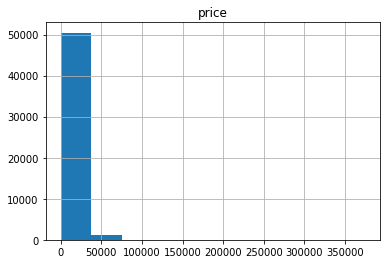

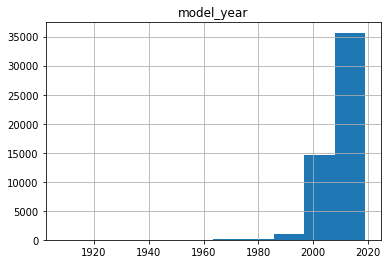

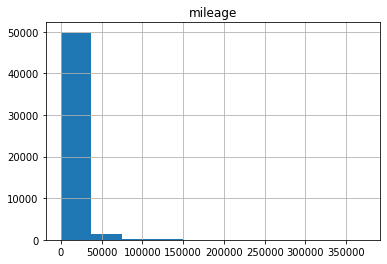

In [34]:
# Procesamos un instrumento de programación para estudiar los parámetros anteriormente expuestos

parameters = ['price', 'model_year', 'mileage'] 

for i in range(len(parameters)):
    df.hist(parameters[i])
    


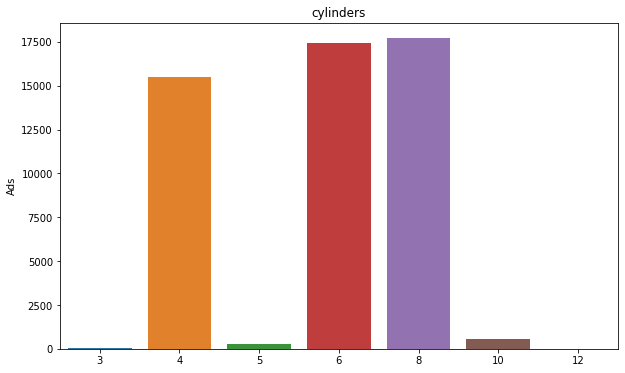

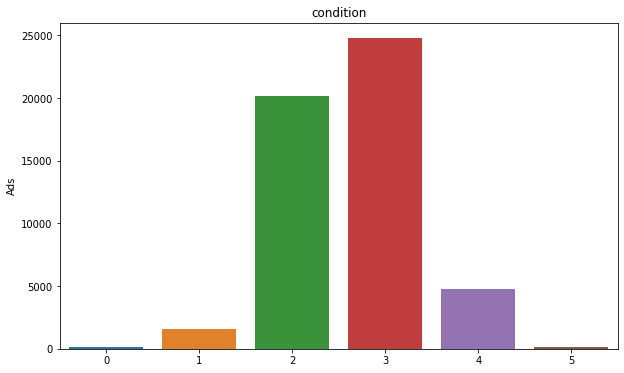

In [35]:
for column in ['cylinders', 'condition']:
    plt.figure(figsize=(10,6))
    sns.countplot(x=column, data=df)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show()

A continuación, ajustaremos el rango y el número de contenedores de las columnas price y model_year

Text(0.5, 1.0, 'Price')

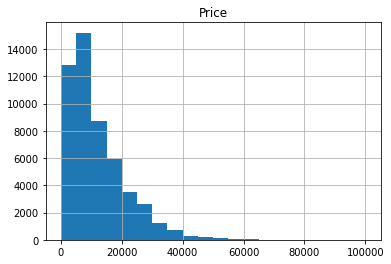

In [33]:
# Detallamos con más profundidad las columnas "price" y "model_year"

df["price"].hist(bins = 20, range = (0, 100000))
plt.title('Price')

Text(0.5, 1.0, 'Price')

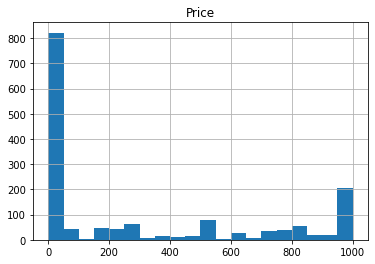

In [34]:
df['price'].hist(bins = 20, range = (0, 1000))
plt.title('Price')

Text(0.5, 1.0, 'Model Year')

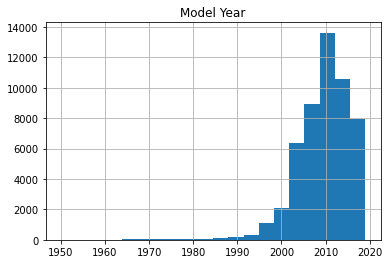

In [35]:
df['model_year'].hist(bins = 20, range = (1950, 2019))
plt.title('Model Year')

Text(0.5, 1.0, 'Model Year')

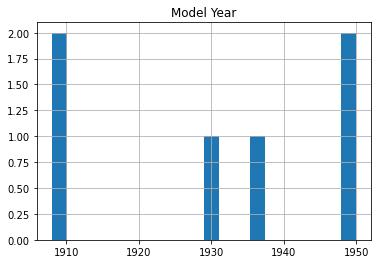

In [36]:
df['model_year'].hist(bins = 20, range = (1908, 1950))
plt.title('Model Year')

### Diagramas de caja

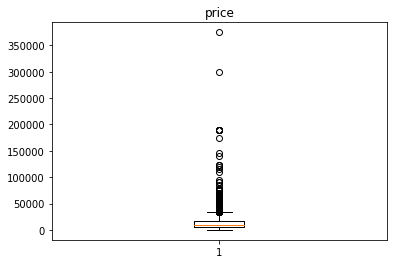

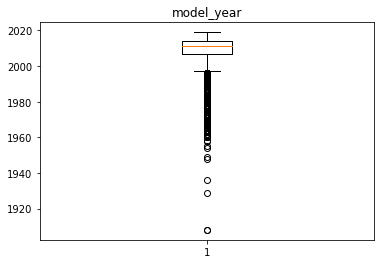

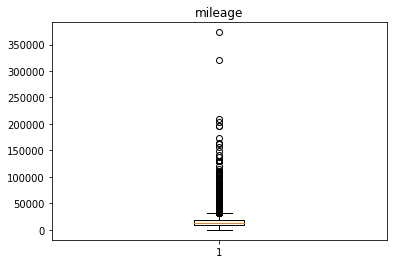

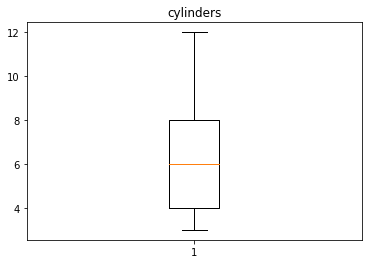

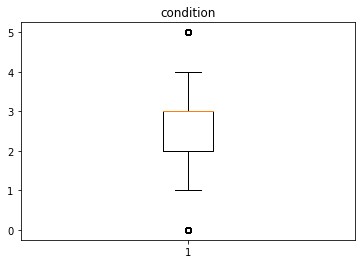

In [37]:
# Procesamos un instrumento de programación para estudiar los parámetros anteriormente expuestos

for diagrama in parameters:
    plt.figure()  
    plt.boxplot(df[diagrama])
    plt.title(diagrama)

(1.0, 20000.0)

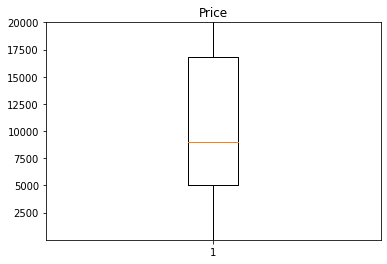

In [38]:
# Detallamos con más profundidad las columnas "price" y "model_year".

plt.boxplot(df["price"])
plt.title("Price")
plt.ylim([1, 20000])

(1908.0, 1950.0)

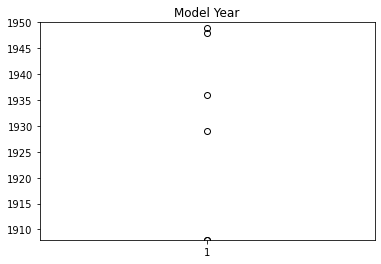

In [39]:

plt.boxplot(df["model_year"])
plt.title("Model Year")
plt.ylim([1908, 1950])



### Generalidades de las columnas

In [40]:
# Mostramos las generalidades de cada columna

for generalidad in parameters:
    print(df[parameters].describe())

               price    model_year        mileage     cylinders     condition
count   51525.000000  51525.000000   51525.000000  51525.000000  51525.000000
mean    12132.464920   2009.710917   15321.344571      6.121494      2.637535
std     10040.803015      6.100053   11909.906552      1.657296      0.712447
min         1.000000   1908.000000       0.000000      3.000000      0.000000
25%      5000.000000   2007.000000    9286.000000      4.000000      2.000000
50%      9000.000000   2011.000000   13029.000000      6.000000      3.000000
75%     16839.000000   2014.000000   18000.000000      8.000000      3.000000
max    375000.000000   2019.000000  373200.000000     12.000000      5.000000
               price    model_year        mileage     cylinders     condition
count   51525.000000  51525.000000   51525.000000  51525.000000  51525.000000
mean    12132.464920   2009.710917   15321.344571      6.121494      2.637535
std     10040.803015      6.100053   11909.906552      1.657296 

## Estudiar y tratar valores atípicos

Vamos a estudiar las columas price, model_year y mileage, debido que poseen valores atípicos

In [41]:
# Definimos la funciones que nos darán los límites

def quantiles(vector):
    Q1 = vector.quantile(0.25)
    Q3 = vector.quantile(0.75)
    return Q1, Q3

def lower_limit(Q1, Q3):
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    return lower

def upper_limit(Q1, Q3):
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    return upper


In [42]:
price = df['price']
print(quantiles(price))

model_year = df['model_year']
print(quantiles(model_year))

mileage = df['mileage']
print(quantiles(mileage))

(5000.0, 16839.0)
(2007.0, 2014.0)
(9286.0, 18000.0)


In [43]:
# Determina los límites inferiores para valores atípicos

print('Limite inferior de Price:' ,lower_limit(5000, 16839))
print('Limite inferior de Model Year:' ,lower_limit(2007, 2014))
print('Limite inferior de Mileage:' ,lower_limit(9286, 18000))




Limite inferior de Price: -12758.5
Limite inferior de Model Year: 1996.5
Limite inferior de Mileage: -3785.0


In [44]:
# Determinar los límites superiores para valores atípicos

print('Limite superior de Price:' ,upper_limit(5000, 16839))
print('Limite superior de Model Year:' ,upper_limit(2007, 2014))
print('Limite superior de Mileage:' ,upper_limit(9286, 18000))


Limite superior de Price: 34597.5
Limite superior de Model Year: 2024.5
Limite superior de Mileage: 31071.0


In [45]:
# Almacena los datos sin valores atípicos en un DataFrame separado

df_new = df[(df['price'] > 1000) 
            & (df['price'] < 34598)
            & (df['model_year'] > 1996 )
            & (df['mileage'] < 31071)]

df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         44689 non-null  int64         
 1   model_year    44689 non-null  int64         
 2   model         44689 non-null  object        
 3   condition     44689 non-null  int64         
 4   cylinders     44689 non-null  int64         
 5   fuel          44689 non-null  object        
 6   odometer      44689 non-null  int64         
 7   transmission  44689 non-null  object        
 8   type          44689 non-null  object        
 9   paint_color   44689 non-null  object        
 10  is_4wd        44689 non-null  bool          
 11  date_posted   44689 non-null  object        
 12  days_listed   44689 non-null  int64         
 13  timestamp     44689 non-null  datetime64[ns]
 14  year_posted   44689 non-null  int64         
 15  mileage       44689 non-null  int64 

## Estudiar parámetros principales sin valores atípicos

Analizaremos la variables de price, model_year y mileage con datos filtrados y compararemos los histogramas

Text(0.5, 1.0, 'Price New')

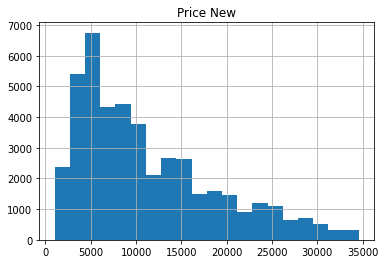

In [46]:
df_new['price'].hist(bins = 20, range = (1000, 34598))
plt.title('Price New')

Text(0.5, 1.0, 'Comparation Price')

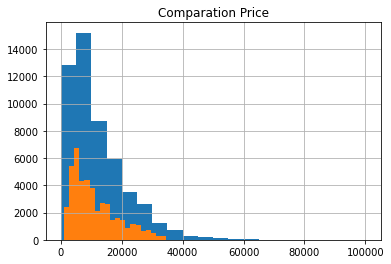

In [47]:
df["price"].hist(bins = 20, range = (0, 100000))
df_new['price'].hist(bins = 20, range = (1000, 34598))
plt.title('Comparation Price')

Text(0.5, 1.0, 'Model Year New')

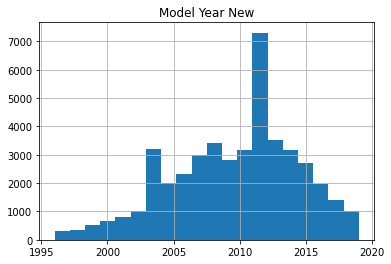

In [48]:
df_new['model_year'].hist(bins = 20, range = (1996, 2019))
plt.title('Model Year New')

Text(0.5, 1.0, 'Comparation Model Year')

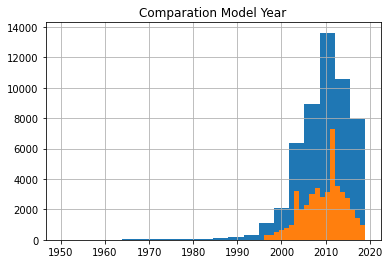

In [49]:
df['model_year'].hist(bins = 20, range = (1950, 2019))
df_new['model_year'].hist(bins = 20, range = (1996, 2019))
plt.title('Comparation Model Year')

<AxesSubplot:>

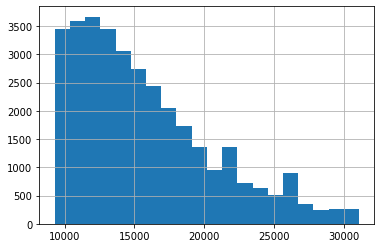

In [50]:
df_new['mileage'].hist(bins = 20, range = (9286, 31071))

Text(0.5, 1.0, 'Comparation Mileage')

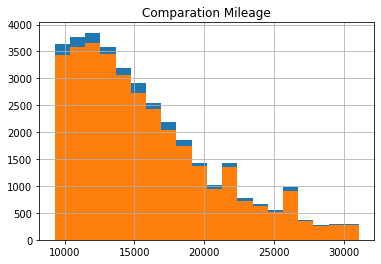

In [51]:
df['mileage'].hist(bins = 20, range = (9286, 31071))
df_new['mileage'].hist(bins = 20, range = (9286, 31071))
plt.title('Comparation Mileage')

## Periodo de colocación de los anuncios

En este apartado, estudiaremos los días en que los anuncios fueron mostrados (days_listed). Acá, calcularemos la media, la mediana y las generalidades de los datos. Además, sabremos cuándo se eliminaron los anunciones y cuando son publicados por un tiempo que es anormalmente largo.

In [52]:
df_new['days_listed'].mean()

39.57698762559019

In [53]:
df_new['days_listed'].median() 

33.0

In [54]:
df_new['days_listed'].describe()

count    44689.000000
mean        39.576988
std         28.239915
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [55]:
(df_new['days_listed'] > 19).value_counts()

True     32990
False    11699
Name: days_listed, dtype: int64

In [56]:
(df_new['days_listed'] < 53).value_counts()

True     33181
False    11508
Name: days_listed, dtype: int64

In [59]:
days_listed_fast = df_new.query('days_listed < 19')

In [60]:
days_listed_slow = df_new.query('days_listed > 53')

In [73]:
days_listed = df['days_listed']
quantiles(days_listed)

(19.0, 53.0)

In [63]:
lower_limit(19.0, 53.0)

-32.0

In [64]:
upper_limit(19.0, 53.0)

104.0

In [65]:
days_listed_slow = df_new[(df_new['days_listed'] > 104)]


In [67]:
df_new.query("days_listed == 0")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year_posted,mileage
1247,14995,2008,chevrolet silverado 1500,3,8,gas,93300,automatic,truck,grey,True,2018-05-15,0,2018-05-15,2018,8481
1983,14000,1999,ford f250,3,8,diesel,137500,automatic,truck,red,True,2018-09-27,0,2018-09-27,2018,6875
2883,4000,2004,ram 1500,3,8,gas,250000,automatic,truck,brown,True,2018-08-13,0,2018-08-13,2018,16666
4567,5000,2007,toyota corolla,2,4,gas,223000,manual,sedan,silver,False,2018-07-11,0,2018-07-11,2018,18583
4901,12500,2001,ram 1500,2,8,gas,99892,automatic,truck,black,True,2018-05-11,0,2018-05-11,2018,5549
6548,4800,2007,honda odyssey,2,6,gas,152400,automatic,mini-van,brown,False,2018-09-25,0,2018-09-25,2018,12700
7036,5900,2007,jeep grand cherokee laredo,3,6,gas,106687,automatic,SUV,grey,True,2018-07-21,0,2018-07-21,2018,8890
9607,4999,2012,nissan sentra,3,4,gas,125000,automatic,sedan,silver,False,2019-03-26,0,2019-03-26,2019,15625
9732,15000,2003,ford f-150,2,8,gas,90048,automatic,truck,black,False,2018-09-21,0,2018-09-21,2018,5628
10722,3100,2000,chevrolet silverado,2,8,gas,211000,automatic,truck,white,False,2018-07-06,0,2018-07-06,2018,11105


In [81]:
days_listed_fast = df_new[(df_new['days_listed'] == 0)]

In [82]:
days_listed_fast.pivot_table(index = 'condition', values = ['price', 'mileage'])

,mileage,price
condition,,
1,12193.500000,2350.000000
2,11886.315789,9872.315789
3,12881.000000,11326.894737
4,11042.666667,16182.166667


In [83]:
days_listed_slow.pivot_table(index = 'condition', values = ['price', 'mileage'])

,mileage,price
condition,,
0,14533.500000,4347.500000
1,12856.633333,3161.333333
2,13769.673111,10108.333919
3,13746.692308,11691.210826
4,12185.035714,13345.830357
5,17100.000000,7000.000000


In [70]:
days_listed_fast.groupby('condition')['condition'].count()

condition
1     2
2    19
3    19
4     6
Name: condition, dtype: int64

In [71]:
df_new.query("days_listed == 271")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year_posted,mileage
4360,5200,2011,chevrolet impala,4,6,gas,122000,automatic,sedan,unknown,False,2018-05-24,271,2018-05-24,2018,15250


In [72]:
df_new['model_year'].describe()

count    44689.000000
mean      2009.632930
std          4.716119
min       1997.000000
25%       2007.000000
50%       2010.000000
75%       2013.000000
max       2019.000000
Name: model_year, dtype: float64

In [80]:
df['model_year'].describe()

count    51525.000000
mean      2009.710917
std          6.100053
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

A continuación, mencionamos lo siguiente:

a. En primer lugar, las columnas price, model_year y mileage mostraron datos atípicos, siendo el 7% de los datos que se eliminaron.

b. Con respecto a price, la desviación estándar paso de 10040 a 7751 con datos filtrados. La mayoría de los datos se ven debajo de la media, 11202 dólares mientras que los datos atípicos se ven por encima en el histograma y el diagrama de caja.

c. En model_year, vemos que la media esta en el año 2010 y los datos extremos se ubican por años más viejos a este dato. Asimismo, la mayoría de los datos se encuentran concentrados por encima de la media.

d. Debido a que se definieron distintos límites en los tiempos de publicación no se pudo detectar una correlación determinante con otras variables.

e. El tiempo medio de publicación fue casi de 40 días mientras que el tiempo de publicación más largo (271 días) tiene solo un valor.

f. Revisando los tiempos extremadamente cortos las condiciones de los vehículos (0 días), tenemos 6 que son como nuevos, 19 excelentes asi como bien y 2 que se condicionan como bastante.

g. Los factores con mayor impacto al momento de los días publicados fueron la condición del vehiculo junto el millaje y el precio. Un auto con una condición de bueno ronda entre los 9.900 dolares y los 11900 de millaje promedio, mientras que un auto en condición de excelente está en los 11.400 dolares y su millaje promedio casi en los 13.000. Por ende, con esas relaciones es cuando el auto fue publicado por menos de 19 días.

Si superan los 53 días, por ejemplo. Si tomamos la condicion de bueno y excelente, los precios estan en 10.000 y 11.700 dólares, y sus millajes promedio en 13.800 respectivamente. Que quiere decir esto, que si presentan un precio mas barato en relacion con sus millajes, los dias de publicacion seran menores.





## Precio promedio por cada tipo de vehículo

En este apartado, investigaremos el precio promedio de cada modelo de vehículo y su relación con el número de anuncios publicados.

In [74]:
price_ads = df_new.pivot_table(index = 'type', values = 'price', aggfunc = ['mean', 'count']).reset_index()

price_ads = price_ads.sort_values(('count','price'), ascending = False)


<AxesSubplot:xlabel='type'>

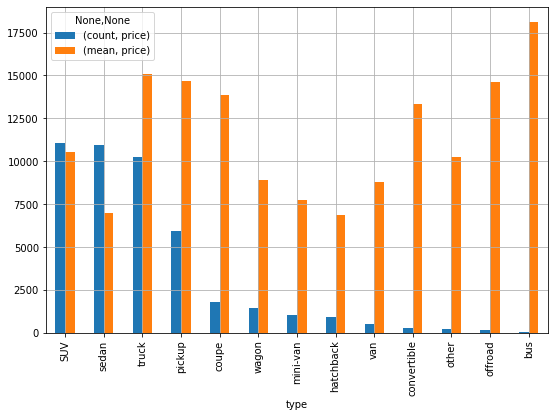

In [79]:
price_ads.plot(kind = 'bar', x = 'type', y = ['count', 'mean'], grid = True, figsize = (9,6))


Con respecto:
    
a. Los vehículos con mayor cantidad de anuncios son SUV y sedan, mientras que los mas costosos son el bus y el truck.

b. Al parecer no existe una relación entre el precio promedio de los vehículos y el número de anuncios

## Factores de precio

En esta sección analizaremos los factores que mas influyen en el precio.

In [149]:
df_new.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year_posted,mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,2018,18125
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19,2018,8870
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,2019,15714
3,1500,2003,ford f-150,1,8,gas,183062,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,2019,10768
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,2019,26967


In [150]:
sedan = df_new.query("type == 'sedan'")
sedan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10974 entries, 2 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         10974 non-null  int64         
 1   model_year    10974 non-null  int64         
 2   model         10974 non-null  object        
 3   condition     10974 non-null  int64         
 4   cylinders     10974 non-null  int64         
 5   fuel          10974 non-null  object        
 6   odometer      10974 non-null  int64         
 7   transmission  10974 non-null  object        
 8   type          10974 non-null  object        
 9   paint_color   10974 non-null  object        
 10  is_4wd        10974 non-null  bool          
 11  date_posted   10974 non-null  object        
 12  days_listed   10974 non-null  int64         
 13  timestamp     10974 non-null  datetime64[ns]
 14  year_posted   10974 non-null  int64         
 15  mileage       10974 non-null  int64 

<AxesSubplot:xlabel='mileage', ylabel='price'>

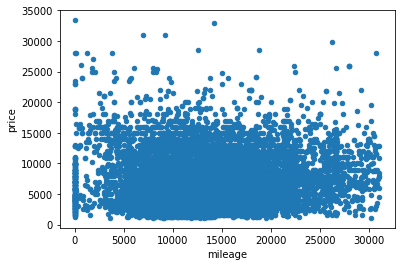

In [151]:
sedan.plot.scatter(x = 'mileage', y = 'price')

<AxesSubplot:xlabel='mileage', ylabel='price'>

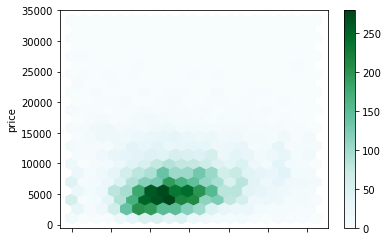

In [152]:
sedan.plot.hexbin(x = 'mileage', y = 'price', gridsize = 20)

<AxesSubplot:xlabel='model_year', ylabel='condition'>

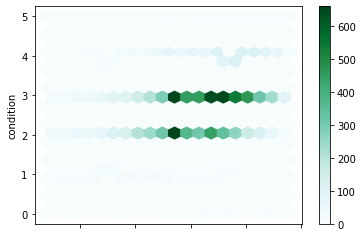

In [154]:
sedan.plot.hexbin(x = 'model_year', y = 'condition', gridsize = 20)

In [156]:
sedan['transmission'].value_counts()

automatic    10371
manual         535
other           68
Name: transmission, dtype: int64

In [157]:
sedan = sedan.query("transmission != 'other'")
sedan['transmission'].value_counts()

automatic    10371
manual         535
Name: transmission, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

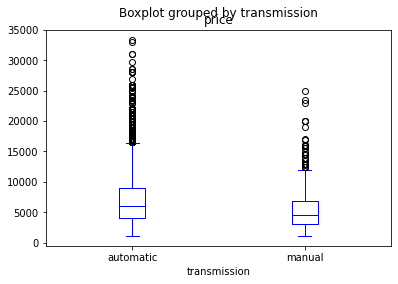

In [158]:
sedan.boxplot(column = ['price'], by = 'transmission', grid = False, color = 'blue')

In [159]:
sedan['paint_color'].value_counts()

unknown    1945
silver     1855
black      1589
grey       1489
white      1327
blue       1125
red         853
brown       244
custom      242
green       187
purple       23
yellow       19
orange        8
Name: paint_color, dtype: int64

In [160]:
sedan = sedan.query("paint_color not in ['purple', 'yellow', 'orange']")
sedan['paint_color'].value_counts()

unknown    1945
silver     1855
black      1589
grey       1489
white      1327
blue       1125
red         853
brown       244
custom      242
green       187
Name: paint_color, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

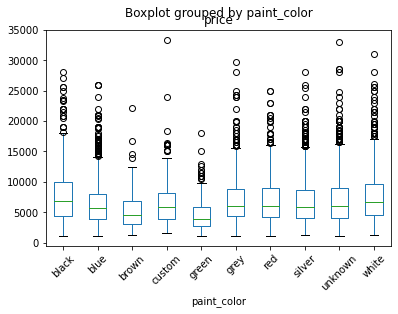

In [161]:
sedan.boxplot(column = ['price'], by = 'paint_color', grid = False, rot = 45)

In [162]:
suv = df_new.query("type == 'SUV'")
suv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11056 entries, 0 to 51516
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         11056 non-null  int64         
 1   model_year    11056 non-null  int64         
 2   model         11056 non-null  object        
 3   condition     11056 non-null  int64         
 4   cylinders     11056 non-null  int64         
 5   fuel          11056 non-null  object        
 6   odometer      11056 non-null  int64         
 7   transmission  11056 non-null  object        
 8   type          11056 non-null  object        
 9   paint_color   11056 non-null  object        
 10  is_4wd        11056 non-null  bool          
 11  date_posted   11056 non-null  object        
 12  days_listed   11056 non-null  int64         
 13  timestamp     11056 non-null  datetime64[ns]
 14  year_posted   11056 non-null  int64         
 15  mileage       11056 non-null  int64 

<AxesSubplot:xlabel='mileage', ylabel='price'>

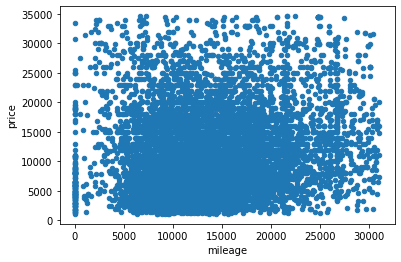

In [163]:
suv.plot.scatter(x = 'mileage', y = 'price')

<AxesSubplot:xlabel='mileage', ylabel='price'>

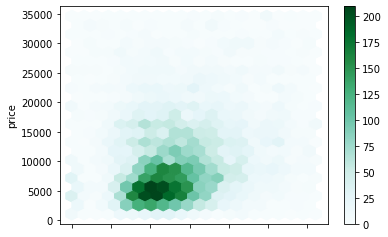

In [164]:
suv.plot.hexbin(x = 'mileage', y = 'price', gridsize = 20)

<AxesSubplot:xlabel='model_year', ylabel='condition'>

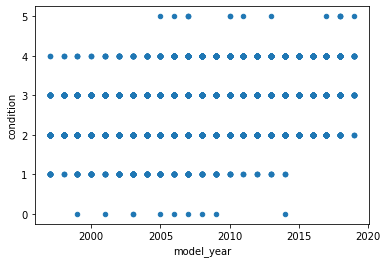

In [165]:
suv.plot.scatter(x = 'model_year', y = 'condition')

<AxesSubplot:xlabel='model_year', ylabel='condition'>

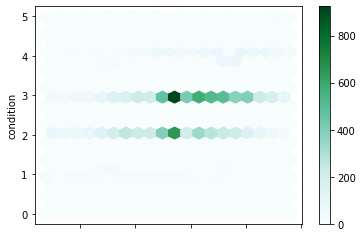

In [166]:
suv.plot.hexbin(x = 'model_year', y = 'condition', gridsize = 20)


In [168]:
suv['transmission'].value_counts()

automatic    10521
manual         443
other           92
Name: transmission, dtype: int64

In [169]:
suv = suv.query("transmission != 'other'")
suv['transmission'].value_counts()

automatic    10521
manual         443
Name: transmission, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

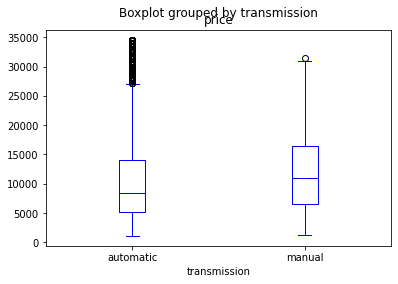

In [170]:
suv.boxplot(column = ['price'], by = 'transmission', grid = False, color = 'blue')

In [171]:
suv['paint_color'].value_counts()

unknown    1956
black      1894
white      1722
silver     1420
grey       1065
blue        930
red         819
green       389
brown       351
custom      263
orange       75
yellow       42
purple       38
Name: paint_color, dtype: int64

In [172]:
suv = suv.query("paint_color not in ['orange', 'yellow', 'purple']")
suv['paint_color'].value_counts()

unknown    1956
black      1894
white      1722
silver     1420
grey       1065
blue        930
red         819
green       389
brown       351
custom      263
Name: paint_color, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

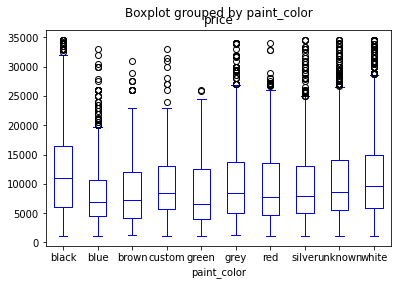

In [173]:
suv.boxplot(column = ['price'], by = 'paint_color', grid = False, color = 'blue')

Comentamos lo siguiente:

a. Los factores que más determinan el precio de los vehículos son el año, su millaje y la condición.
    
b. Cuando estudiamos variables categoricas, los vehículos que son de transmisión automática y de color negro son los que muestran
un precio más alto.

c Por razones obvias, el precio disminuye con el aumento del millaje.

d La mayor parte de los vehículos poseen condición buena y excelente sin tener relación con el año del auto.

## Conclusión general


a. Nos encontramos con unas columnas con valores ausentes, la estrategia fue rellenarlos con valores promedios, menos en el caso de is_4wd, que lo tratamos como un tipo booleano. Además se crearon nuevas columnas para determinar el millaje, los años en que estuvo posteado el vehículo, fecha.

b. Las columnas que mostraron más valores atípicos fueron price y model_year, siendo un 7% de sus datos.

C. Los factores que determinan más el precio de un vehículo son el año, su millaje y la condición.

d. Los precios más elevados son los autos con transmisión automática y de color negro.

e. Los precios disminuyen con un millaje alto.

f. La mayoría de los vehículos son de condición buena y excelente.

g. Los factores que tienen relación con los días publicados son la condición, el precio y el millaje. Los vehículos que sus dias publicados fueron de aproximadamente medio mes mostraron precios mucho mas económicos que los vehículos con un precio y millaje más alto, rondando en diferencias de precio entre los 100 a 500 dólares.
